In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/an-online-shop-business/Sales Transaction v.4a.csv


In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/an-online-shop-business/Sales Transaction v.4a.csv')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [4]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


In [5]:
df.nunique()

TransactionNo    23204
Date               305
ProductNo         3768
ProductName       3768
Price              530
Quantity           510
CustomerNo        4738
Country             38
dtype: int64

In [6]:
df = df.drop_duplicates()

In [7]:
df = df.dropna()

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour
df['Revenue'] = df['Quantity'] * df['Price']


In [10]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Month,DayOfWeek,Hour,Revenue
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,12,Monday,0,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,12,Monday,0,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,12,Monday,0,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,12,Monday,0,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,12,Monday,0,71.64


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

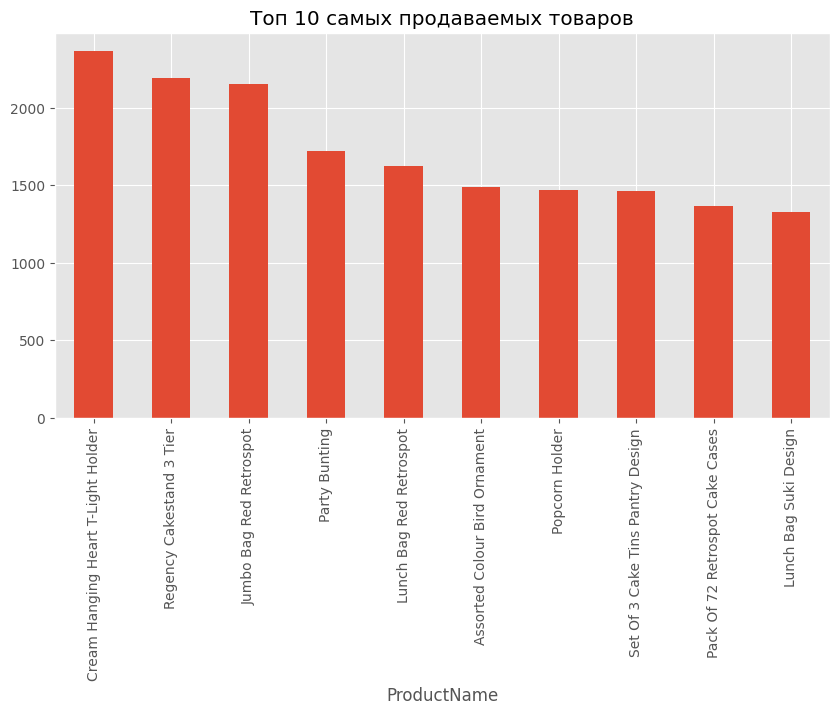

In [12]:
df['ProductName'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.title('Топ 10 самых продаваемых товаров')
plt.show()

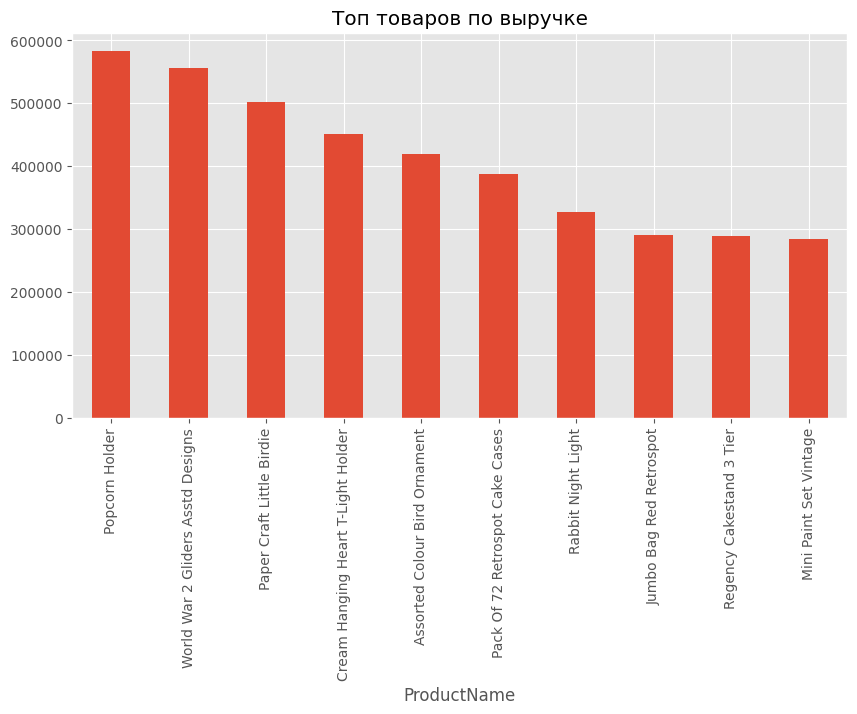

In [13]:
df.groupby('ProductName')['Revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))
plt.title('Топ товаров по выручке')
plt.show()

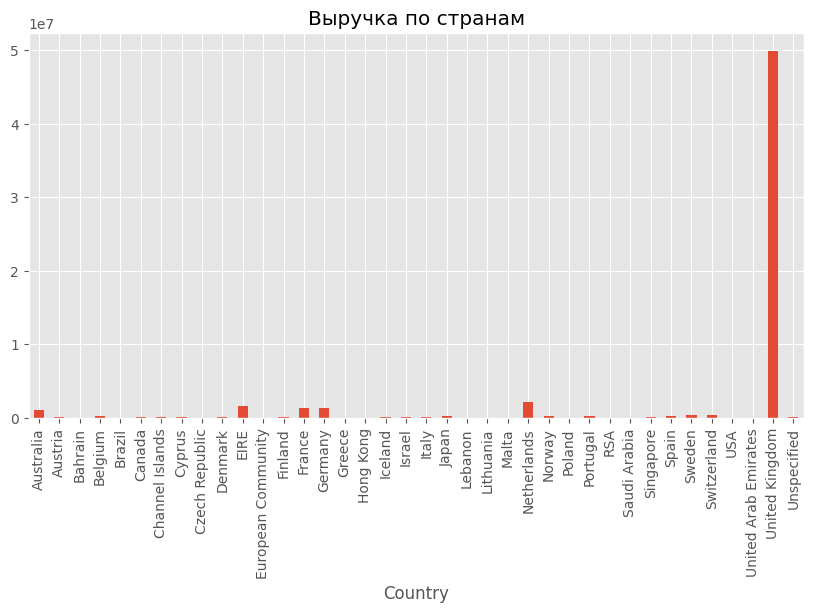

In [14]:
df.groupby('Country')['Revenue'].sum().plot(kind='bar', figsize=(10,5))
plt.title('Выручка по странам')
plt.show()

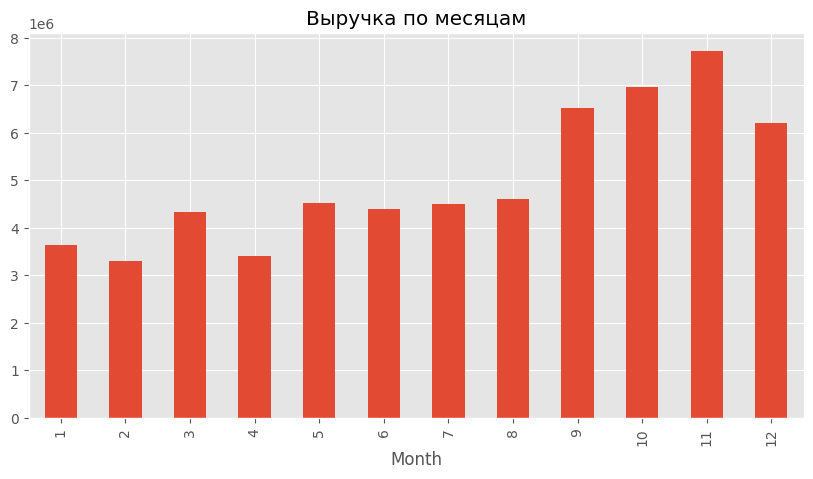

In [15]:
df.groupby('Month')['Revenue'].sum().plot(kind='bar', figsize=(10,5))
plt.title('Выручка по месяцам')
plt.show()

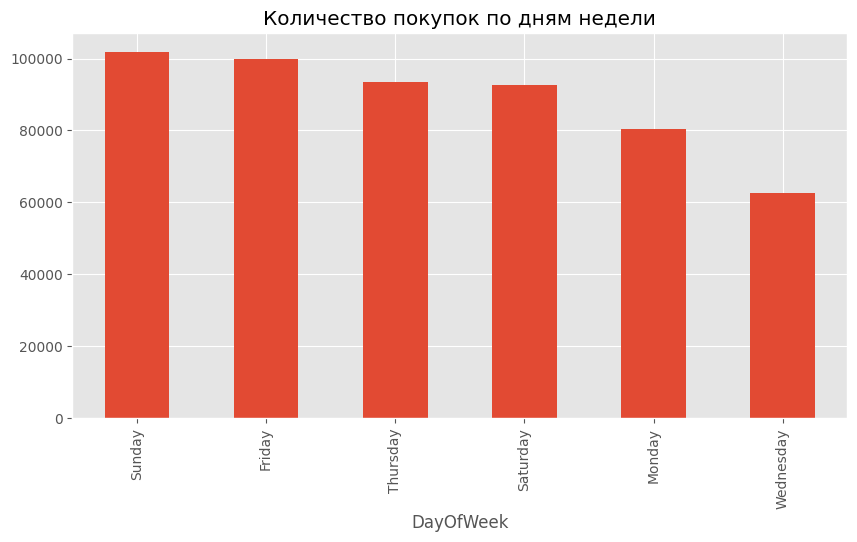

In [16]:
df['DayOfWeek'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Количество покупок по дням недели')
plt.show()

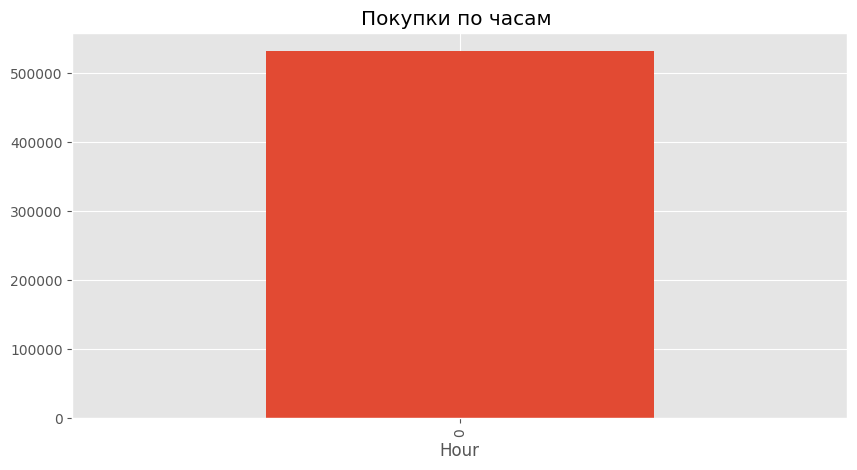

In [17]:
df['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title('Покупки по часам ')
plt.show()

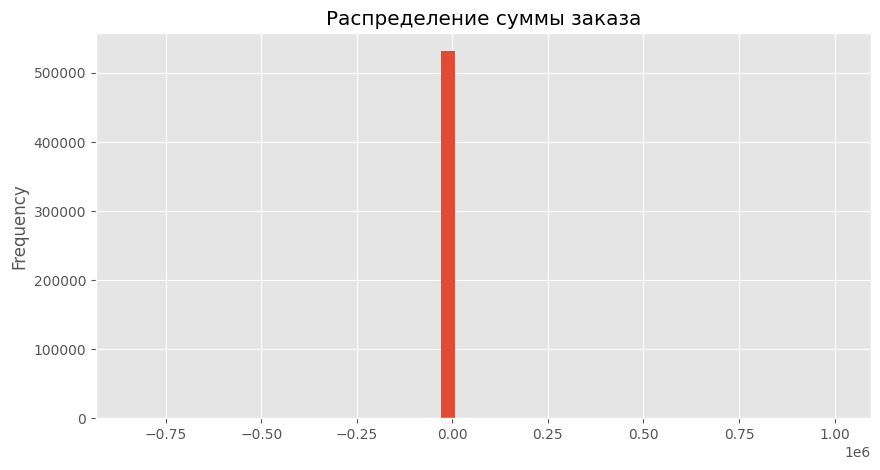

In [18]:
df['Revenue'].plot(kind='hist', bins = 50,figsize = (10,5))
plt.title('Распределение суммы заказа')
plt.show()

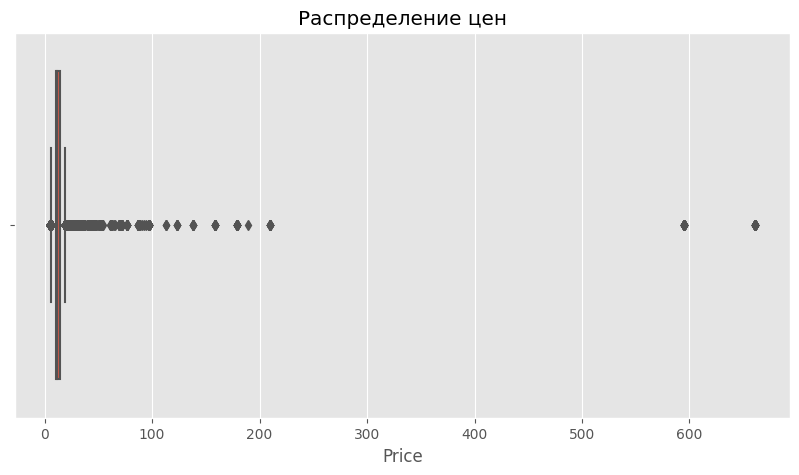

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Price'])
plt.title('Распределение цен')
plt.show()

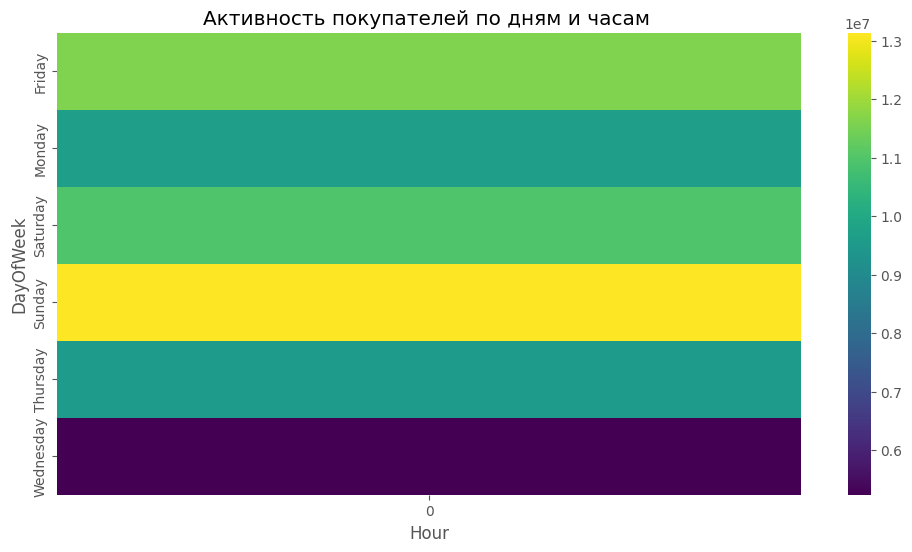

In [20]:
pivot = df.pivot_table(index = 'DayOfWeek', columns = 'Hour', values = 'Revenue' , aggfunc = 'sum')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap= 'viridis' )
plt.title('Активность покупателей по дням и часам ')
plt.show()


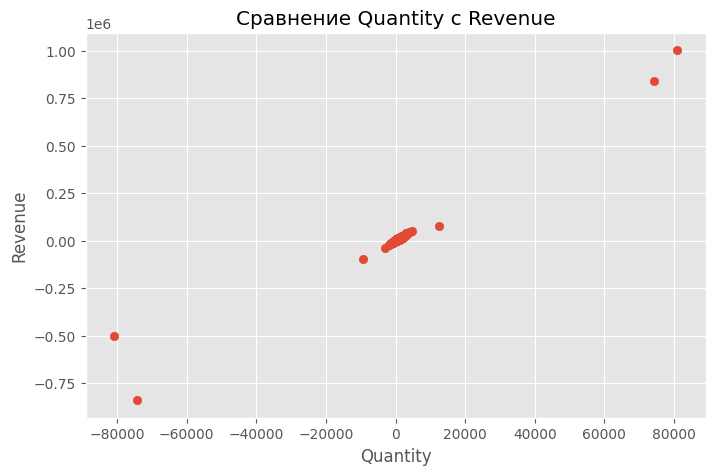

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(df['Quantity'], df['Revenue'])
plt.title('Сравнение Quantity с Revenue')
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.show()